In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
data = fetch_california_housing()
X = data.data[:, [0]] 
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



In [35]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred = model.predict(X_test_poly)
print(y_pred)

[1.06494053 1.4809167  1.92725435 ... 4.22733844 1.60211615 1.96035252]


In [37]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients (slopes):", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 0.7032732680932143
Model Coefficients (slopes): [ 0.          0.53359111 -0.010508  ]
Model Intercept: 0.19756732564563562


In [38]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
print(X_plot_poly)
# X_plot_poly = scaler.transform(X_plot_poly)
y_plot = model.predict(X_plot_poly)

[[  1.           0.4999       0.24990001]
 [  1.           0.52895852   0.27979711]
 [  1.           0.55801703   0.31138301]
 ...
 [  1.          14.94198297 223.26285495]
 [  1.          14.97104148 224.13208308]
 [  1.          15.0001     225.00300001]]


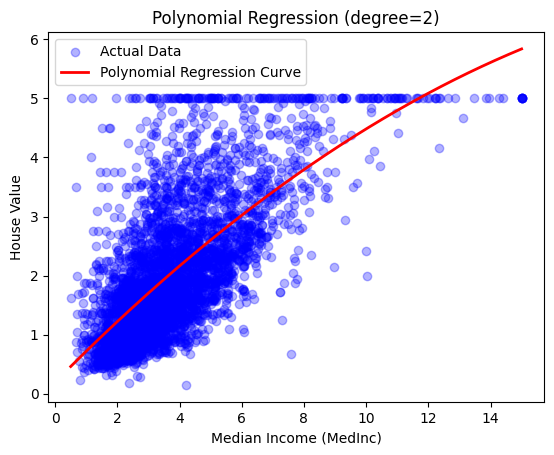

In [39]:
plt.scatter(X_test, y_test, color="blue", alpha=0.3, label="Actual Data")
plt.plot(X_plot, y_plot, color="red", linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Value")
plt.title("Polynomial Regression (degree=2)")
plt.legend()
plt.show()

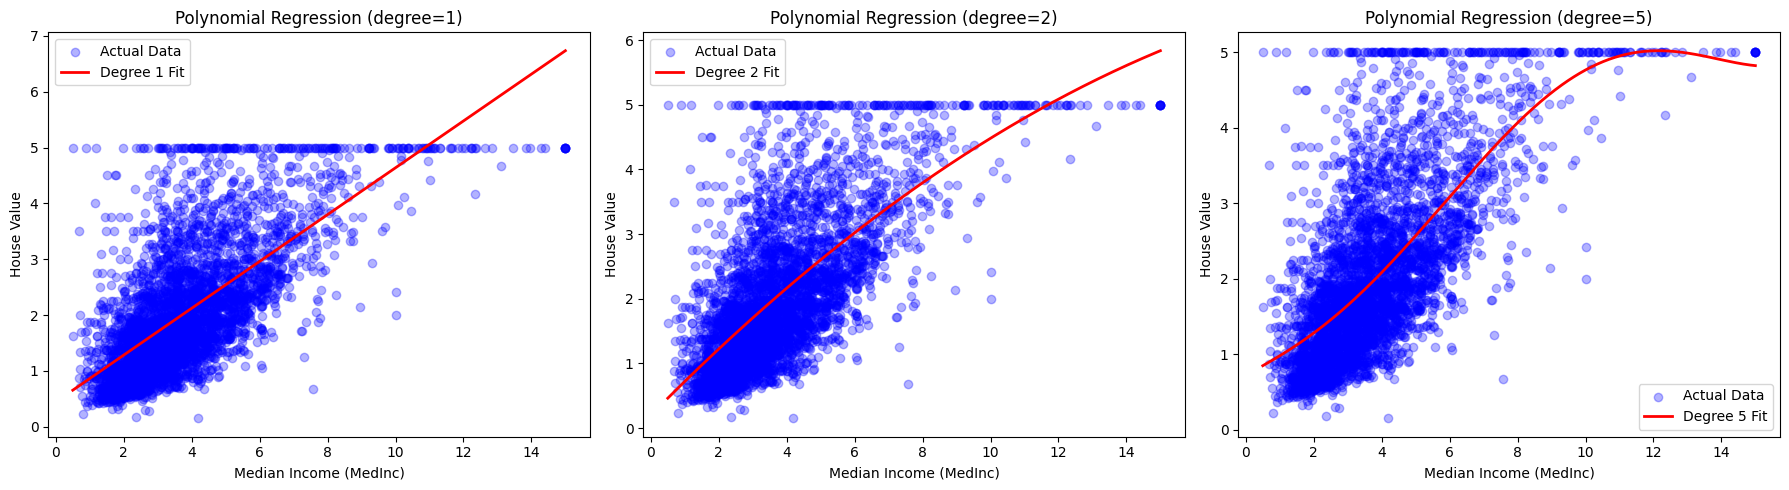

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# ---------------------------
# 1. Load Dataset
# ---------------------------
data = fetch_california_housing()
X = data.data[:, [0]]   # use only Median Income (MedInc) for visualization
y = data.target

# ---------------------------
# 2. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3. Function to Train + Plot Polynomial Regression
# ---------------------------
def plot_poly_regression(degree, ax):
    # Step 1: Expand polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Scale features
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    # Step 3: Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 4: Predict curve
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    X_plot_poly = scaler.transform(X_plot_poly)
    y_plot = model.predict(X_plot_poly)

    # Step 5: Plot
    ax.scatter(X_test, y_test, color="blue", alpha=0.3, label="Actual Data")
    ax.plot(X_plot, y_plot, color="red", linewidth=2, label=f"Degree {degree} Fit")
    ax.set_xlabel("Median Income (MedInc)")
    ax.set_ylabel("House Value")
    ax.set_title(f"Polynomial Regression (degree={degree})")
    ax.legend()

# ---------------------------
# 4. Compare degrees (1, 2, 5)
# ---------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, degree in enumerate([1, 2, 5]):
    plot_poly_regression(degree, axes[i])

plt.tight_layout()
plt.show()
